# <img src="../leo_ipynb_title_icon.jpeg" alt="Logo" style="height: 2em; vertical-align: middle;"/>Online Book Recommender System



# 1. Business Understanding  
---

## 1.1 Introduction  
The **Online Book Recommender System** aims to personalize user experiences by suggesting relevant books based on their preferences and behavior. With the growing volume of books available online, users often face **choice overload**, leading to decreased engagement.  

**Key Goals**:  
- Improve user retention and engagement.  
- Increase cross-selling/up-selling opportunities.  
- Solve the "cold-start" problem for new users/books.  

**Approach**:  
- **Collaborative Filtering**: Leverage user-book interactions (e.g., ratings).  
- **Content-Based Filtering**: Use book metadata (genre, author, descriptions).  
- **Hybrid Model**: Combine both for more accurate recommendations.  

---

## 1.2 Problem Statement  
**Core Objective**:  
> *"Build a ML system that recommends books to users based on their past behavior and book features, while addressing data sparsity and cold-start challenges."*  

**Challenges**:  
1. **Data Sparsity**: Most users rate very few books.  

2. **Cold Start**: No historical data for new users/books.  
3. **Diversity**: Avoiding over-specialization in recommendations.  

**Success Metrics**:  
- **Model**: RMSE (rating prediction), Precision@K (top-K recs).  
- **Business**: Increased CTR, reduced bounce rates.  

---

## 1.3 Key Stakeholders  
| Stakeholder          | Interest/Impact                                                                 |  
|----------------------|---------------------------------------------------------------------------------|  
| **End Users**        | Personalized book discoveries, better engagement.                               |  
| **Platform**         | Higher sales, improved retention (e.g., Amazon/Goodreads).                      |  
| **Publishers**       | Increased visibility for niche books.                                            |  
| **Data Team**        | Scalable models with measurable business impact.                                 |  

---



# 2. Data Understanding  
---
## 2.1. File Overview
We have 3 dataframes for this project namely `books_df.csv`, `ratings_df.csv` and `user_df.csv`

## 2.2 Load Data

In [1]:
import pandas as pd

# Read books data
books_df = pd.read_csv(
    '../books_df.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',     # Handles fields enclosed in double quotes
    escapechar='\\'    # Handles escaped quotes inside those fields (e.g. \" )
)

# Read ratings data
ratings_df = pd.read_csv('../ratings_df.csv', sep=';', encoding='latin1')  # encoding to fix UnicodeDecodeError

# Read users data
users_df = pd.read_csv('../user_df.csv', sep=';', encoding='latin1')  # encoding to fix UnicodeDecodeError


## 2.3 Data Inspection

In [2]:
display(books_df.head(2))
books_df.info()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


- This dataframe contains info on the movies

In [3]:
display(ratings_df.head(2))
ratings_df.info()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


- This dataframes contains info on how different users rated different books

In [4]:
display(users_df.head(2))
users_df.info()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


- This dataframes contains info on different users

## 2.4 Dataset Features Description

### Books Dataset (`books_df`)
**Records**: 271,379 books | **Features**: 8

| Feature | Description |
|---------|-------------|
| ISBN | International Standard Book Number (unique identifier) |
| Book-Title | Complete title of the book including subtitles |
| Book-Author | Author(s) of the book |
| Year-Of-Publication | Original publication year of the edition |
| Publisher | Company/organization that published the book |
| Image-URL-S | URL for small thumbnail cover image |
| Image-URL-M | URL for medium-sized cover image |
| Image-URL-L | URL for large/high-resolution cover image |

---

### Ratings Dataset (`ratings_df`)  
**Records**: 1,149,780 ratings | **Features**: 3

| Feature | Description |
|---------|-------------|
| User-ID | Anonymous unique identifier of the rating user |
| ISBN | Book identifier (matches books_df) |
| Book-Rating | Numerical rating given by user (scale to be verified) |

---

### Users Dataset (`users_df`)  
**Records**: 278,858 users | **Features**: 3

| Feature | Description |
|---------|-------------|
| User-ID | Unique identifier (matches ratings_df) |
| Location | Free-text location description (e.g., "New York, NY, USA") |
| Age | Self-reported age in years |

## 3.1 Data Cleaning

### 3.1.1 Handling Missing Values

In [5]:
# initialize list of dfs
df_list =[books_df, ratings_df, users_df]

In [6]:
#check missing values
for df in df_list:
    display(df.isna().sum())


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID          0
Location         0
Age         110762
dtype: int64

- In **`books_df`** missing values represent  **0.0011055 %** of the data which is not statistically significant hence we shall drop rows with these missing values and represent a very small fraction of thes data with over 271,000 books.
- In **`users_df`** missing values in the `age` column represent **39.7198574 %** of the data. This is statistically significant. Before imputing/dropping the column we shall check whether there is a correlation between age and ratings

#### 3.1.1.1 Dropping missing values in `books_df`

In [7]:
# Drop missing values
books_df =books_df.dropna()

# verify drop
display(books_df.isna().sum())
display(books_df.shape)

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

(271376, 8)

#### 3.1.1.2 Handling missing values in `age` column, `users_df`

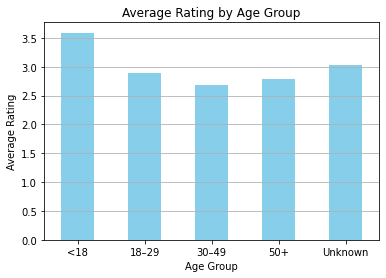

Available age-rating pairs: 840,288
Pearson Correlation Matrix:


,Age,Book-Rating
Age,1.000000,-0.028238
Book-Rating,-0.028238,1.000000


In [8]:

import matplotlib.pyplot as plt


# Merge ratings with user ages
age_ratings = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age']],
    on='User-ID',
    how='inner'
)

# Define age bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['<18', '18–29', '30–49', '50+']

# Create age group with an "Unknown" category
users_df['Age_Group'] = pd.cut(users_df['Age'], bins=age_bins, labels=age_labels)
users_df['Age_Group'] = users_df['Age_Group'].cat.add_categories('Unknown').fillna('Unknown')

# Plot average rating by age group (excluding 'Unknown')
age_ratings = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age_Group']],
    on='User-ID',
    how='inner'
)


age_ratings.groupby('Age_Group')['Book-Rating'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Rating by Age Group')
plt.ylabel('Average Rating')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Correlation analysis on known ages
age_ratings_corr = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age']],
    on='User-ID',
    how='inner'
).dropna(subset=['Age'])

print(f"Available age-rating pairs: {len(age_ratings_corr):,}")
corr = age_ratings_corr[['Age', 'Book-Rating']].corr(method='pearson')
print("Pearson Correlation Matrix:")
display(corr)


#### Age Data Handling Strategy

- **Missing Age Values**: 110,762 out of 278,858 users (~39.7%) had missing ages.
- **Concern regarding imputaion**: Imputation may introduce noise because of the following reasons:
  1. A very weak correlation with ratings (r = -0.0282).
  2. Introduction of imputation bias due to high no of NaNs.

#### Stategy:
To better support content-based and hybrid recommendation systems:

- Age is **binned** into 4 discrete groups: `<18`, `18–29`, `30–49`, `50+`.
- Users with missing ages are placed into a separate **'Unknown'** category.
- This allows age to be retained as a categorical feature while avoiding noisy imputations.

This strategy preserves potentially useful demographic signals without compromising data quality or model robustness.


In [9]:
#drop column and verify
users_df = users_df.drop(columns= ['Age'])
users_df.columns

Index(['User-ID', 'Location', 'Age_Group'], dtype='object')

### 3.1.2 Handling Duplicates

- For this we shall check dataframes individually since some have some unique identifiers
#### `books_df`

In [10]:
#check duplicates
display(books_df['ISBN'].duplicated().sum())

0

- `books_df` has no duplicates
#### `ratings_df`


In [11]:
#check duplicates
display(ratings_df[['ISBN','User-ID']].duplicated().sum())

0

- `ratings_df` has no duplicates either
#### `users_df`


In [12]:
#check duplicates
display(users_df['User-ID'].duplicated().sum())

0

- `users_df` has no duplicates either.
- Thus, the datasets have no duplicates
- Data Cleaning is complete, there is no need to check for outliers in this project since `Age`column has already been dropped.

## 3.3 Dataset Merging

### 3.3.1 Validating keys before merging
- We shall check if the unique identifiers of `books_df` and `users_df` match those in `ratings_df`

In [13]:
# Check ISBN consistency between books and ratings
isbn_match = ratings_df['ISBN'].isin(books_df['ISBN']).mean() * 100
print(f"Ratings with valid ISBNs: {isbn_match:.2f}%")

# Check User-ID consistency between users and ratings
user_match = ratings_df['User-ID'].isin(users_df['User-ID']).mean() * 100
print(f"Ratings with valid User-IDs: {user_match:.2f}%")

Ratings with valid ISBNs: 89.68%
Ratings with valid User-IDs: 100.00%


### Data Consistency Summary

- **Valid ISBNs in ratings**: 89.68%  
~10% of ratings reference books not found in `books_df` (possibly due to typos, missing entries, or alternate ISBNs).  

- **Valid User-IDs in ratings**: 100.00%  
All ratings have matching users in `users_df`; user data is fully consistent.


### 3.3.2 Merge `ratings_df` with `books_df`

In [14]:
ratings_books = ratings_df.merge(
    books_df[['ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']],
    on='ISBN',
    how='left'
)

print(f"Merged ratings-books shape: {ratings_books.shape}")
print(f"Unmatched ratings: {ratings_books['Book-Title'].isna().sum()}")

Merged ratings-books shape: (1149780, 7)
Unmatched ratings: 118608


### 3.3.3 Merge `ratings_books` with `users_df`
- This is done to get the info on location and age

In [15]:
users_df.columns

Index(['User-ID', 'Location', 'Age_Group'], dtype='object')

In [16]:
merged_df = ratings_books.merge(
    users_df[['User-ID', 'Location','Age_Group']],
    on='User-ID',
    how='left'
)

merged_df.sample(n=10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Year-Of-Publication,Location,Age_Group
255144,58964,0446610542,5,The Bachelor (Warner Books Contemporary Romance),Carly Phillips,Warner Forever,2002.0,"sterling, illinois, usa",Unknown
395548,95359,0064400980,10,Betsy and Tacy Go Downtown (Betsy-Tacy),Maud Hart Lovelace,HarperTrophy,2000.0,"charleston, west virginia, usa",30–49
109385,25311,0140126562,0,Gracie: A Love Story,George Burns,Penguin USA,1989.0,"durham, north carolina, usa",Unknown
1017853,243947,0696001306,0,Meat (Better Homes and Gardens Cookbook Series),Better Homes and Gardens Test Kitchen,Meredith Corp,1977.0,"costa mesa, california, usa",30–49
436878,104636,0061013412,0,Orchid Beach (Holly Barker Novels (Paperback)),Stuart Woods,HarperTorch,1999.0,"youngstown, ohio, usa",Unknown
961907,232131,0515132136,0,The Jury,Steve Martini,Jove Books,2002.0,"oakland, california, usa",Unknown
281934,67079,0952030039,10,Cigar Box of Tricks,Shaun Clark,Circustuff,1994.0,"london, england, united kingdom",30–49
928570,225763,0801978890,0,Speed-Cut Quilts (Creative Machine Arts Series),Donna Poster,Krause Pubns Inc,1989.0,"san francisco, california, usa",Unknown
345359,82497,0446612383,8,NaN,NaN,NaN,NaN,"yulee, florida, usa",30–49
801014,194600,0671526723,7,Audrey Hepburns Neck,Alan Brown,Pocket,1997.0,"toronto, ontario, canada",50+


In [17]:
merged_df['Book-Title'].isna().sum()

118608

### Handling Missing Book Metadata

- Approximately **10.31%** of the ratings (118,608 entries) have missing book metadata.
- This arises because these ISBNs are present in `ratings_df` but not found in `books_df`.
- Instead of dropping these records, we will retain all ratings since the ISBNs can be useful in **collaborative filtering** models.
- To keep track of such cases, we will introduce a flag indicating whether metadata is missing for each entry.


### 3.3.4 Feature Engineering
#### 3.3.4.1 Introducing tag for metadata

In [18]:
merged_df['Book-Title'].isna().sum()

118608

In [19]:
# Tag them for reference
merged_df['Missing_Metadata'] = merged_df['Book-Title'].isna()

In [20]:
len(merged_df[merged_df['Book-Title'].isna()])


118608

#### 3.3.4.1 Introducing column for country and city
- This will make it possible to observe trends in EDA phase

In [21]:
# Extract and clean country 
merged_df['Country'] = (
    merged_df['Location']
    .str.split(',')
    .str[-1]
    .str.strip()
    .str.title()
    .replace(['', 'N/A', 'Na', 'Null'], 'Unknown')
    .fillna('Unknown') 
)

# Extract and clean City (middle part)
merged_df['City'] = (
    merged_df['Location']
    .str.split(',')
    .str[1]
    .str.strip()
    .str.title()
    .replace(['', 'N/A', 'Na', 'Null'], 'Unknown')
    .fillna('Unknown')
)
#display top 10 countries
display(merged_df['Country'].value_counts().head(10))

#display top 10 cities
display(merged_df['City'].value_counts().head(10))

Usa               768068
Canada            103782
United Kingdom     50593
Unknown            41215
Germany            39675
Australia          26477
Spain              25742
France             13877
Italy              12147
Portugal           10518
Name: Country, dtype: int64

California    110462
Unknown        50005
Ontario        46080
Texas          45206
Florida        35265
Missouri       34057
Washington     32643
England        32483
Illinois       31563
New York       30738
Name: City, dtype: int64

- Display final merged dataset

In [22]:
display(merged_df.sample(n= 10, random_state= 42))

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Year-Of-Publication,Location,Age_Group,Missing_Metadata,Country,City
178554,38781,0373259131,0,"Otherwise Engaged (Harlequin Temptation, No 813)",Cara Summers,Harlequin,2001.0,"kingsville, texas, usa",30–49,False,Usa,Texas
533905,128835,0811805905,8,All Smiles,Bruce Velick,Chronicle Books,1995.0,"bellingham, washington, usa",50+,False,Usa,Washington
1091374,261829,037324486X,0,The Heart Beneath (Morgan's Mercenaries: Ult...,Lindsay Mckenna,Silhouette,2002.0,"fpo, ap, usa",30–49,False,Usa,Ap
1036247,247747,0531303306,0,Have You Been to the Beach Lately?: Poems,Ralph J. Fletcher,Orchard Books (NY),2001.0,"portsmouth, ohio, usa",Unknown,False,Usa,Ohio
309523,74076,0316812404,0,Revolution from Within: A Book of Self-Esteem,Gloria Steinem,Little Brown &amp; Co,1992.0,"victoria, british columbia, canada",50+,False,Canada,British Columbia
130089,30273,0312072376,0,Little Ways to Say I Love You,Marjabelle Young Stewart,St. Martin's Press,1992.0,"naples, florida, usa",18–29,False,Usa,Florida
60190,12110,0743431014,6,Songs of the Humpback Whale : A Novel in Five ...,Jodi Picoult,Washington Square Press,2001.0,"dracut, massachusetts, usa",30–49,False,Usa,Massachusetts
785993,189973,0515129283,0,A Hitch in Time (Time Passages Romance Series),Christine Holden,Jove Books,2000.0,"pittsburgh, pennsylvania, usa",Unknown,False,Usa,Pennsylvania
66929,13690,8485224574,6,NaN,NaN,NaN,NaN,"gijón, asturias, spain",50+,True,Spain,Asturias
405917,98391,006000181X,8,With Her Last Breath,Cait London,Avon,2003.0,"morrow, georgia, usa",50+,False,Usa,Georgia


# 4. Exploratory Data Analysis  

## 4.1 Univariate Analysis

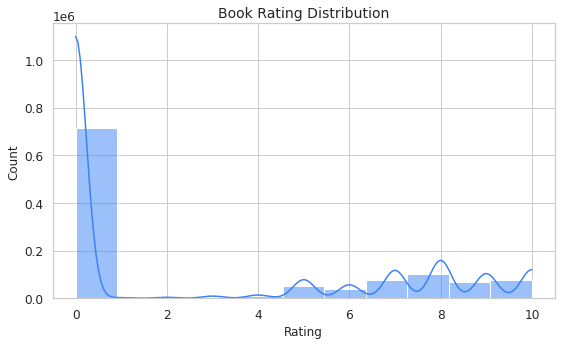

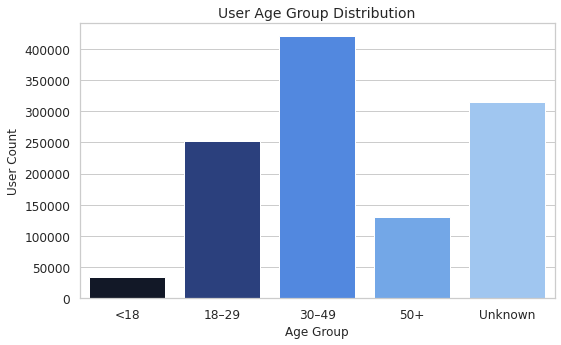

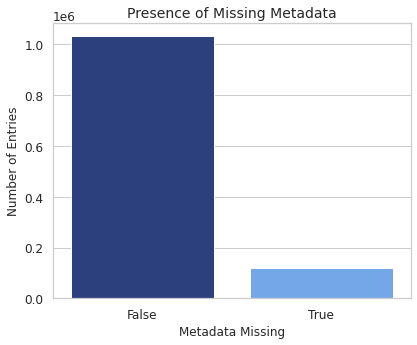

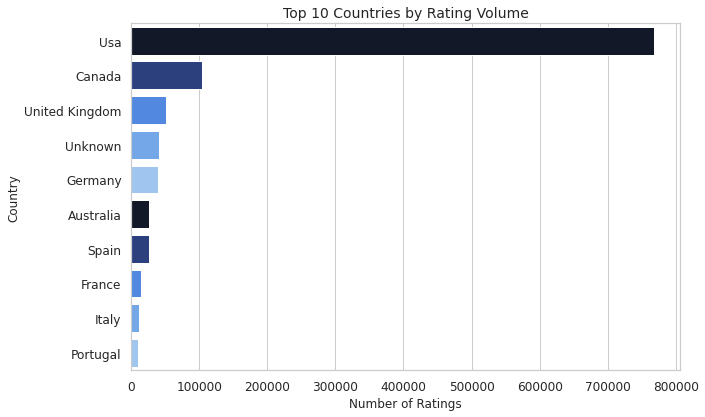

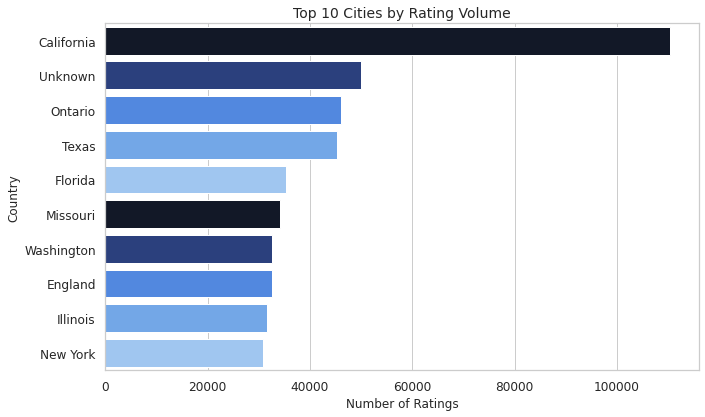

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set_theme(style="whitegrid", font_scale=1.1)
cool_blues = ['#0f172a', '#1e3a8a', '#3b82f6', '#60a5fa', '#93c5fd']
sns.set_palette(cool_blues)

# 1. Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Book-Rating'], bins=11, kde=True, color=cool_blues[2])
plt.title("Book Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# 2. Age Group Distribution
plt.figure(figsize=(8, 5))
age_order = ['<18', '18–29', '30–49', '50+', 'Unknown'] if 'Unknown' in merged_df['Age_Group'].unique() else merged_df['Age_Group'].value_counts().index
sns.countplot(x='Age_Group', data=merged_df, order=age_order, palette=cool_blues)
plt.title("User Age Group Distribution", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.tight_layout()
plt.show()

# 3. Missing Metadata Flag
plt.figure(figsize=(6, 5))
sns.countplot(x='Missing_Metadata', data=merged_df, palette=[cool_blues[1], cool_blues[3]])
plt.title("Presence of Missing Metadata", fontsize=14)
plt.xlabel("Metadata Missing", fontsize=12)
plt.ylabel("Number of Entries", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Top 10 Countries by Rating Volume
plt.figure(figsize=(10, 6))
top_countries = merged_df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette=cool_blues)
plt.title("Top 10 Countries by Rating Volume", fontsize=14)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

# 5. Top 10 Cities by Rating Volume
plt.figure(figsize=(10, 6))
top_countries = merged_df['City'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette=cool_blues)
plt.title("Top 10 Cities by Rating Volume", fontsize=14)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()



## 4.2 Bivariate analysis

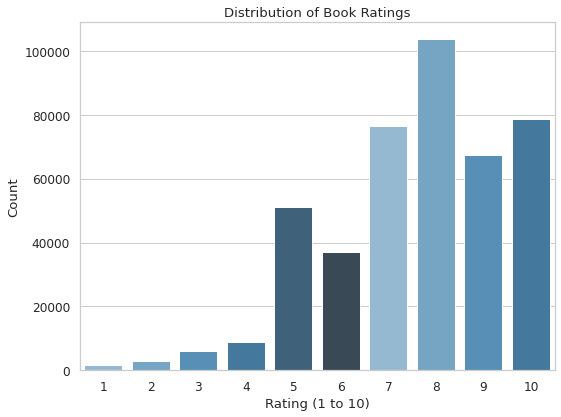

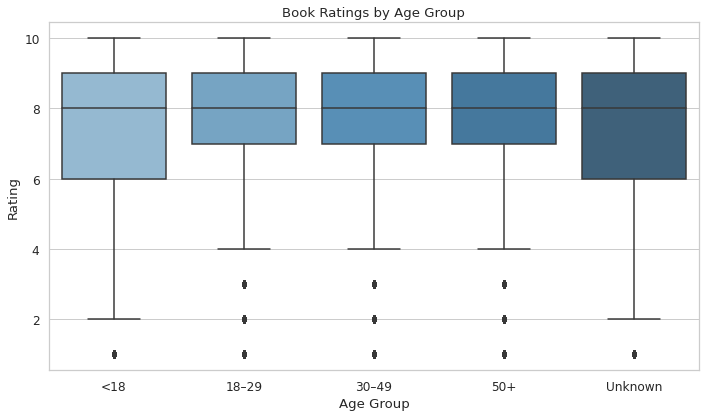

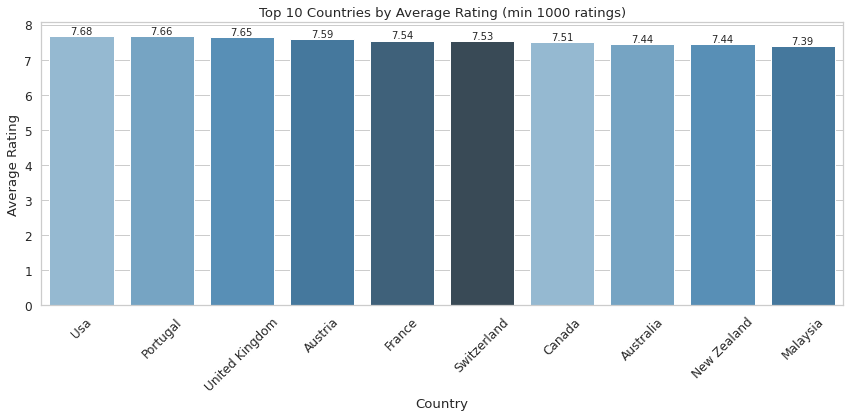

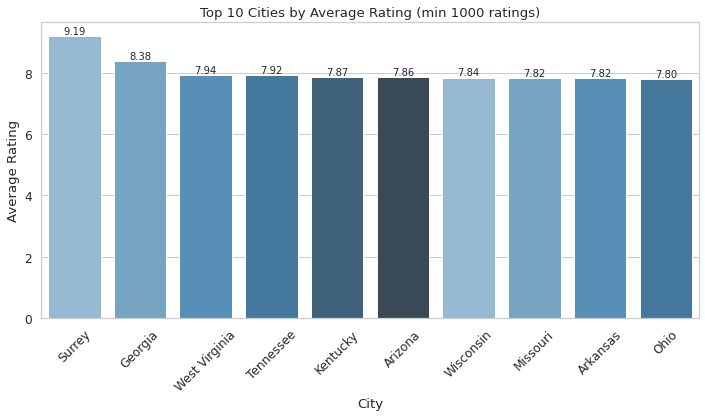

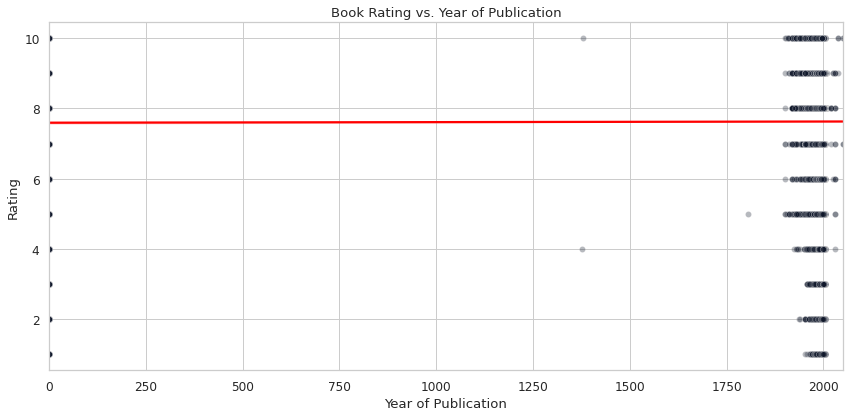

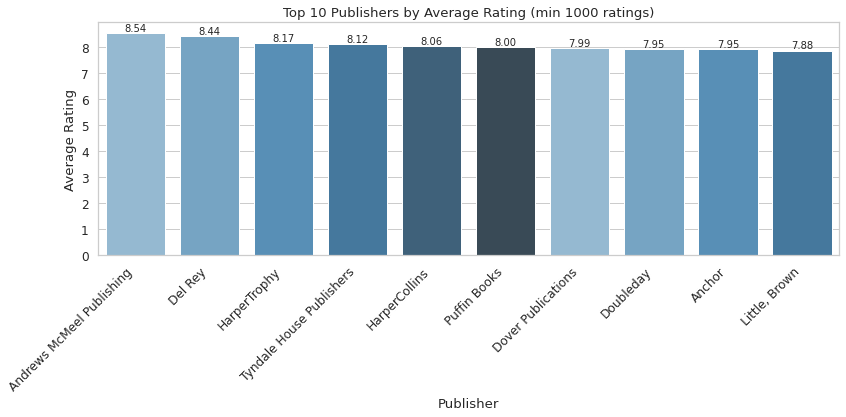

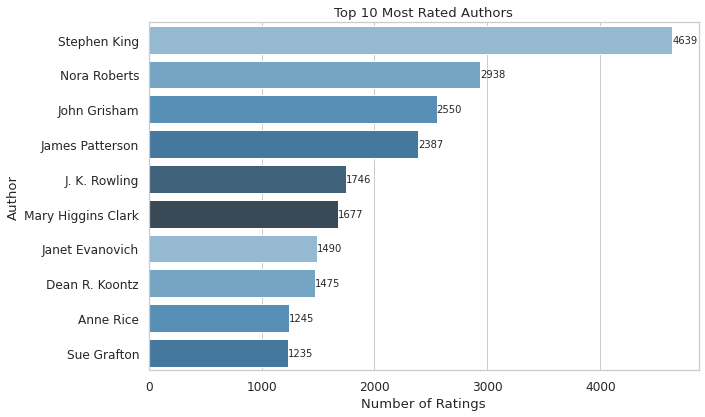

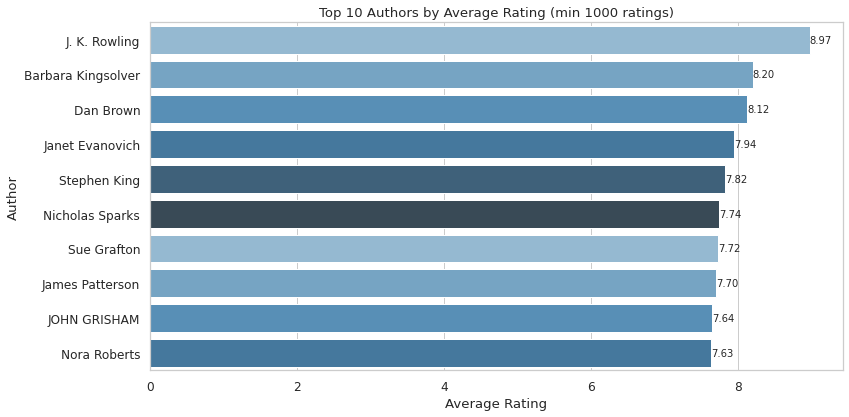

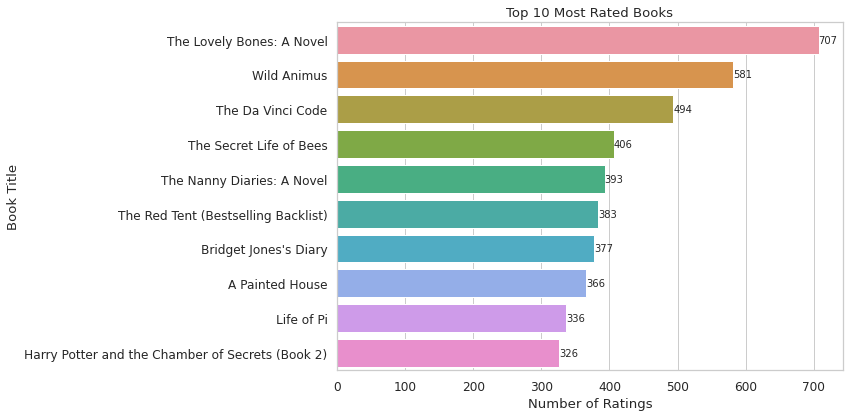

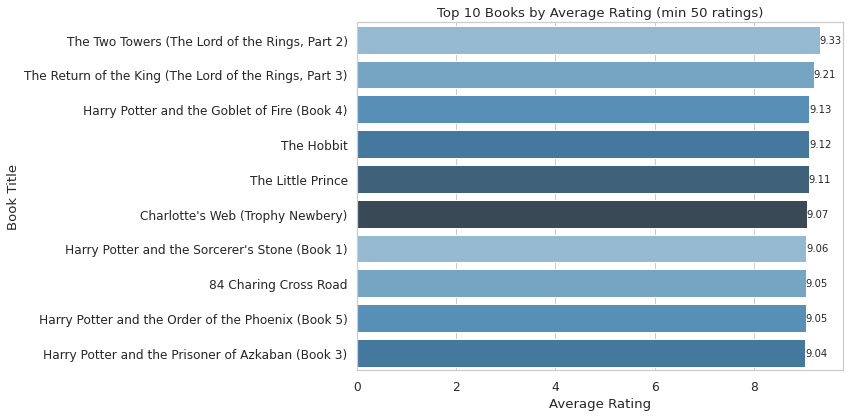

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Color palette
cool_blues = sns.color_palette("Blues_d")

# Filter out 0 ratings (usually not actual ratings)
filtered_df = merged_df[merged_df['Book-Rating'] > 0]

### 1. Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=filtered_df, palette=cool_blues)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating (1 to 10)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 2. Rating Distribution by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Book-Rating', data=filtered_df, palette=cool_blues,
            order=['<18', '18–29', '30–49', '50+', 'Unknown'])
plt.title("Book Ratings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### 3. Average Rating by Country (min 1000 ratings)
country_counts = filtered_df.groupby('Country')['Book-Rating'].count()
eligible_countries = country_counts[country_counts >= 1000].index
country_df = filtered_df[filtered_df['Country'].isin(eligible_countries)]

avg_rating_per_country = country_df.groupby('Country')['Book-Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_rating_per_country.index[:10], y=avg_rating_per_country.values[:10], palette=cool_blues)
plt.title("Top 10 Countries by Average Rating (min 1000 ratings)")
plt.xlabel("Country")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 4. Average Rating by City (min 1000 ratings)
city_counts = filtered_df.groupby('City')['Book-Rating'].count()
eligible_cities = city_counts[city_counts >= 1000].index
city_df = filtered_df[filtered_df['City'].isin(eligible_cities)]

top_cities_rating = city_df.groupby('City')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cities_rating.index, y=top_cities_rating.values, palette=cool_blues)
plt.title("Top 10 Cities by Average Rating (min 1000 ratings)")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 5. Rating vs. Year of Publication (scatter + trend)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=filtered_df, alpha=0.3)
sns.regplot(x='Year-Of-Publication', y='Book-Rating', data=filtered_df, scatter=False, color='red')
plt.title("Book Rating vs. Year of Publication")
plt.xlabel("Year of Publication")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### 6. Average Rating by Publisher (min 1000 ratings)
publisher_counts = filtered_df.groupby('Publisher')['Book-Rating'].count()
eligible_publishers = publisher_counts[publisher_counts >= 1000].index
pub_df = filtered_df[filtered_df['Publisher'].isin(eligible_publishers)]

top_pubs_rating = pub_df.groupby('Publisher')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_pubs_rating.index, y=top_pubs_rating.values, palette=cool_blues)
plt.title("Top 10 Publishers by Average Rating (min 1000 ratings)")
plt.xlabel("Publisher")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 7a. Top 10 Most Rated Authors
most_rated_authors = filtered_df['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=most_rated_authors.values, y=most_rated_authors.index, palette=cool_blues)
plt.title("Top 10 Most Rated Authors")
plt.xlabel("Number of Ratings")
plt.ylabel("Author")
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

### 7b. Top 10 Authors by Average Rating (min 1000 ratings)
author_counts = filtered_df.groupby('Book-Author')['Book-Rating'].count()
eligible_authors = author_counts[author_counts >= 1000].index
author_df = filtered_df[filtered_df['Book-Author'].isin(eligible_authors)]

top_authors_rating = author_df.groupby('Book-Author')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_authors_rating.values, y=top_authors_rating.index, palette=cool_blues)
plt.title("Top 10 Authors by Average Rating (min 1000 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Author")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

### 8a. Top 10 Most Rated Books
most_rated_books = filtered_df['Book-Title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=most_rated_books.values, y=most_rated_books.index)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()

### 8b. Top 10 Books by Average Rating (min 50 ratings)
book_counts = filtered_df.groupby('Book-Title')['Book-Rating'].count()
eligible_books = book_counts[book_counts >= 50].index
book_df = filtered_df[filtered_df['Book-Title'].isin(eligible_books)]

top_books_rating = book_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_books_rating.values, y=top_books_rating.index, palette=cool_blues)
plt.title("Top 10 Books by Average Rating (min 50 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()


## Observations
**Tbd**

## 4.2 Multivariate analysis
## Observations
**Tbd**
*****



# 5. Modeling
# 5.1 Inspecting final merge

In [25]:
display(merged_df.info())
display(merged_df.columns)
display(merged_df.shape)
display(merged_df.sample(n=15, random_state=42))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   User-ID              1149780 non-null  int64   
 1   ISBN                 1149780 non-null  object  
 2   Book-Rating          1149780 non-null  int64   
 3   Book-Title           1031172 non-null  object  
 4   Book-Author          1031172 non-null  object  
 5   Publisher            1031172 non-null  object  
 6   Year-Of-Publication  1031172 non-null  float64 
 7   Location             1149780 non-null  object  
 8   Age_Group            1149780 non-null  category
 9   Missing_Metadata     1149780 non-null  bool    
 10  Country              1149780 non-null  object  
 11  City                 1149780 non-null  object  
dtypes: bool(1), category(1), float64(1), int64(2), object(7)
memory usage: 98.7+ MB


None

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Publisher', 'Year-Of-Publication', 'Location', 'Age_Group',
       'Missing_Metadata', 'Country', 'City'],
      dtype='object')

(1149780, 12)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Year-Of-Publication,Location,Age_Group,Missing_Metadata,Country,City
178554,38781,0373259131,0,"Otherwise Engaged (Harlequin Temptation, No 813)",Cara Summers,Harlequin,2001.0,"kingsville, texas, usa",30–49,False,Usa,Texas
533905,128835,0811805905,8,All Smiles,Bruce Velick,Chronicle Books,1995.0,"bellingham, washington, usa",50+,False,Usa,Washington
1091374,261829,037324486X,0,The Heart Beneath (Morgan's Mercenaries: Ult...,Lindsay Mckenna,Silhouette,2002.0,"fpo, ap, usa",30–49,False,Usa,Ap
1036247,247747,0531303306,0,Have You Been to the Beach Lately?: Poems,Ralph J. Fletcher,Orchard Books (NY),2001.0,"portsmouth, ohio, usa",Unknown,False,Usa,Ohio
309523,74076,0316812404,0,Revolution from Within: A Book of Self-Esteem,Gloria Steinem,Little Brown &amp; Co,1992.0,"victoria, british columbia, canada",50+,False,Canada,British Columbia
130089,30273,0312072376,0,Little Ways to Say I Love You,Marjabelle Young Stewart,St. Martin's Press,1992.0,"naples, florida, usa",18–29,False,Usa,Florida
60190,12110,0743431014,6,Songs of the Humpback Whale : A Novel in Five ...,Jodi Picoult,Washington Square Press,2001.0,"dracut, massachusetts, usa",30–49,False,Usa,Massachusetts
785993,189973,0515129283,0,A Hitch in Time (Time Passages Romance Series),Christine Holden,Jove Books,2000.0,"pittsburgh, pennsylvania, usa",Unknown,False,Usa,Pennsylvania
66929,13690,8485224574,6,NaN,NaN,NaN,NaN,"gijón, asturias, spain",50+,True,Spain,Asturias
405917,98391,006000181X,8,With Her Last Breath,Cait London,Avon,2003.0,"morrow, georgia, usa",50+,False,Usa,Georgia


## 5.2 Collaborative Filtering
## 5.2.1 User-Based Collaborative Filtering

To avoid performance issues on large datasets, we use only 5% of ratings where users gave non-zero scores. We implement a **user-based collaborative filtering** model using cosine similarity with the Surprise library. This model identifies similar users and recommends books based on their ratings. The process includes:

- Patching numpy for compatibility
- Sampling to reduce memory footprint
- Training a KNN-based recommender
- Generating top-N book predictions for a selected user

This setup is scalable and performs well with limited RAM.

### Explanation of setup
- **KNNBasic**  
  Simple and effective algorithm for finding nearest neighbors based on user/item ratings.
- **Cosine Similarity:**  
  Measures directional similarity between rating vectors; well-suited for sparse data.
- **User-based vs Item-based:**  
  - `user_based=True`: Recommends based on similar users' preferences.  
  - `user_based=False`: Recommends items similar to those the user liked.
- **Sampling (5%)** used to reduce memory usage for faster experimentation.



In [26]:
# Step 1: Patch numpy and import libraries
import numpy as np
np.int = int  # For compatibility with Surprise

import pandas as pd
from surprise import Dataset, Reader, KNNBasic
import warnings
warnings.filterwarnings('ignore')

# Step 2: Filter and sample ratings
useful_ratings_df = merged_df[merged_df['Book-Rating'] > 0]
rating_sample_df = useful_ratings_df.sample(frac=0.05, random_state=42)  # sample 5% to reduce memory

display(f"The rating sample has {rating_sample_df.shape[0]} rows and {rating_sample_df.shape[1]} columns.")

# Step 3: Load Surprise dataset
reader = Reader(rating_scale=(1, 10))
ratings_for_surprise = rating_sample_df[['User-ID', 'ISBN', 'Book-Rating']]
user_cf_data = Dataset.load_from_df(ratings_for_surprise, reader)
user_cf_trainset = user_cf_data.build_full_trainset()

# Step 4: Train User-Based Collaborative Filtering model
user_cf_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True}, verbose=False)
user_cf_model.fit(user_cf_trainset)

# Step 5: Define function to get top N recommendations using user-based CF
def get_top_n_user_cf(user_id, n=10):
    try:
        inner_uid = user_cf_trainset.to_inner_uid(user_id)
    except ValueError:
        print(f"User ID {user_id} not found in training set.")
        return []

    rated_items = set(j for (j, _) in user_cf_trainset.ur[inner_uid])
    unseen_items = set(user_cf_trainset.all_items()) - rated_items

    predictions = [user_cf_model.predict(user_id, user_cf_trainset.to_raw_iid(i)) for i in unseen_items]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return [(pred.iid, round(pred.est, 2)) for pred in top_n]

# Step 6: Example usage
sample_user_id = rating_sample_df['User-ID'].sample(n=1, random_state=42).iloc[0]
user_cf_top_books = get_top_n_user_cf(sample_user_id, n=5)

print(f"Top 5 User-Based CF Recommendations for User {sample_user_id}:")
for isbn, score in user_cf_top_books:
    title = merged_df.loc[merged_df['ISBN'] == isbn, 'Book-Title'].dropna().unique()
    print(f"ISBN: {isbn} | Score: {score} | Title: {title[0] if len(title) else 'Unknown'}")


'The rating sample has 21684 rows and 12 columns.'

Top 5 User-Based CF Recommendations for User 102532:
ISBN: 0380018179 | Score: 7.6 | Title: The Thorn Birds
ISBN: 8422641127 | Score: 7.6 | Title: Unknown
ISBN: 3442453844 | Score: 7.6 | Title: Das Familiengrab.
ISBN: 0060586125 | Score: 7.6 | Title: Three Wishes
ISBN: 0316789844 | Score: 7.6 | Title: Resistance : A Novel


### Model Evaluation

In [27]:
from surprise.model_selection import cross_validate

#evaluation, user based
print("---User Based (KNN)---")
results_user_based = cross_validate(user_cf_model, user_cf_data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("------")


---User Based (KNN)---
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8749  1.8449  1.8476  1.8558  0.0136  
MAE (testset)     1.5117  1.5013  1.4982  1.5037  0.0058  
Fit time          2.61    2.63    2.42    2.55    0.09    
Test time         0.05    0.05    0.05    0.05    0.00    
------


## 5.2.2 Item-Based Collaborative Filtering

For Item-Based Collaborative Filtering,we use the hyperparameter `'user_based': False` while initializing the KNNBasic algorithm. The rest of the steps are similar to those in User-Based filtering above.

In [28]:
"""# Step 1: Use the same rating_sample_df (no need to sample again)

# Step 2: Load Surprise dataset
item_cf_data = Dataset.load_from_df(ratings_for_surprise, reader)
item_cf_trainset = item_cf_data.build_full_trainset()

# Step 3: Train Item-Based Collaborative Filtering model
item_cf_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': False}, verbose=False)
item_cf_model.fit(item_cf_trainset)

# Step 4: Define function to get top N recommendations using item-based CF
def get_top_n_item_cf(user_id, n=10):
    try:
        inner_uid = item_cf_trainset.to_inner_uid(user_id)
    except ValueError:
        print(f"User ID {user_id} not found in training set.")
        return []

    rated_items = set(j for (j, _) in item_cf_trainset.ur[inner_uid])
    unseen_items = set(item_cf_trainset.all_items()) - rated_items

    predictions = [item_cf_model.predict(user_id, item_cf_trainset.to_raw_iid(i)) for i in unseen_items]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return [(pred.iid, round(pred.est, 2)) for pred in top_n]

# Step 5: Example usage
sample_user_id = rating_sample_df['User-ID'].sample(n=1, random_state=42).iloc[0]
item_cf_top_books = get_top_n_item_cf(sample_user_id, n=5)

print(f"Top 5 Item-Based CF Recommendations for User {sample_user_id}:")
for isbn, score in item_cf_top_books:
    title = merged_df.loc[merged_df['ISBN'] == isbn, 'Book-Title'].dropna().unique()
    print(f"ISBN: {isbn} | Score: {score} | Title: {title[0] if len(title) else 'Unknown'}")
"""

'# Step 1: Use the same rating_sample_df (no need to sample again)\n\n# Step 2: Load Surprise dataset\nitem_cf_data = Dataset.load_from_df(ratings_for_surprise, reader)\nitem_cf_trainset = item_cf_data.build_full_trainset()\n\n# Step 3: Train Item-Based Collaborative Filtering model\nitem_cf_model = KNNBasic(sim_options={\'name\': \'cosine\', \'user_based\': False}, verbose=False)\nitem_cf_model.fit(item_cf_trainset)\n\n# Step 4: Define function to get top N recommendations using item-based CF\ndef get_top_n_item_cf(user_id, n=10):\n    try:\n        inner_uid = item_cf_trainset.to_inner_uid(user_id)\n    except ValueError:\n        print(f"User ID {user_id} not found in training set.")\n        return []\n\n    rated_items = set(j for (j, _) in item_cf_trainset.ur[inner_uid])\n    unseen_items = set(item_cf_trainset.all_items()) - rated_items\n\n    predictions = [item_cf_model.predict(user_id, item_cf_trainset.to_raw_iid(i)) for i in unseen_items]\n    top_n = sorted(predictions, key

### Model Evaluation

In [29]:
"""
#evaluation, item based
print("---Item Based---")
results_item_based = cross_validate(algo, data_item_based, measures=['RMSE', 'MAE'], cv=3, verbose=True)
"""



'\n#evaluation, item based\nprint("---Item Based---")\nresults_item_based = cross_validate(algo, data_item_based, measures=[\'RMSE\', \'MAE\'], cv=3, verbose=True)\n'

## 5.2.3 Matrix Factorization (SVD)

To improve recommendation quality, we apply **Singular Value Decomposition (SVD)** using the Surprise library.  
Unlike KNN, SVD learns **latent factors** representing users and items, enabling better predictions even with sparse data.

We use the full dataset (non-zero ratings) without sampling, train the SVD model, and generate top-N book recommendations.

### Key Points
- **SVD:**  
  Learns hidden patterns by factorizing the user-item matrix into lower dimensions.
- **Advantages over KNN:**  
  - Handles sparsity better.  
  - Captures deeper relationships beyond surface-level similarity.  
  - Scales efficiently to large datasets without needing sampling.
- **No Sampling:**  
  Full dataset used to maximize learning and recommendation quality.


In [30]:
# Step 1: Patch numpy and import libraries
np.int = int  # For compatibility with Surprise


from surprise import SVD
warnings.filterwarnings('ignore')

# Step 2: Filter ratings (no sampling now!)
useful_ratings_df = merged_df[merged_df['Book-Rating'] > 0]

display(f"The dataset has {useful_ratings_df.shape[0]} rows and {useful_ratings_df.shape[1]} columns.")

# Step 3: Load Surprise dataset
reader = Reader(rating_scale=(1, 10))
ratings_for_surprise = useful_ratings_df[['User-ID', 'ISBN', 'Book-Rating']]
user_cf_data = Dataset.load_from_df(ratings_for_surprise, reader)
user_cf_trainset = user_cf_data.build_full_trainset()



# Step 4: Train SVD model
svd_model = SVD()
svd_model.fit(user_cf_trainset)

# Step 5: Define function to get top N recommendations using SVD
def get_top_n_user_cf(user_id, n=10):
    try:
        inner_uid = user_cf_trainset.to_inner_uid(user_id)
    except ValueError:
        print(f"User ID {user_id} not found in training set.")
        return []

    rated_items = set(j for (j, _) in user_cf_trainset.ur[inner_uid])
    unseen_items = set(user_cf_trainset.all_items()) - rated_items

    predictions = [svd_model.predict(user_id, user_cf_trainset.to_raw_iid(i)) for i in unseen_items]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return [(pred.iid, round(pred.est, 2)) for pred in top_n]

# Step 6: Example usage
sample_user_id = useful_ratings_df['User-ID'].sample(n=1, random_state=42).iloc[0]
user_cf_top_books = get_top_n_user_cf(sample_user_id, n=5)

print(f"Top 5 SVD Recommendations for User {sample_user_id}:")
for isbn, score in user_cf_top_books:
    title = merged_df.loc[merged_df['ISBN'] == isbn, 'Book-Title'].dropna().unique()
    print(f"ISBN: {isbn} | Score: {score} | Title: {title[0] if len(title) else 'Unknown'}")


'The dataset has 433671 rows and 12 columns.'

Top 5 SVD Recommendations for User 32440:
ISBN: 8826703132 | Score: 9.52 | Title: Unknown
ISBN: 0812550706 | Score: 9.42 | Title: Ender's Game (Ender Wiggins Saga (Paperback))
ISBN: 0140143505 | Score: 9.34 | Title: 84 Charing Cross Road
ISBN: 0385504209 | Score: 9.34 | Title: The Da Vinci Code
ISBN: 0743454529 | Score: 9.32 | Title: My Sister's Keeper : A Novel (Picoult, Jodi)


### Model Evaluation

In [31]:

print("---Matrix Factorization (SVD)---")
results_svd = cross_validate(svd_model, user_cf_data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print("------")



---Matrix Factorization (SVD)---
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.6438  1.6538  1.6475  1.6484  0.0041  
MAE (testset)     1.2707  1.2787  1.2728  1.2741  0.0034  
Fit time          20.78   20.38   23.22   21.46   1.26    
Test time         1.55    1.53    1.10    1.39    0.21    
------


### 5.2.3 Summary: Collaborative Filtering Models

To evaluate our collaborative filtering models, we used **RMSE (Root Mean Squared Error)** and **MAE (Mean Absolute Error)**, which measure how closely our predicted ratings match the actual ratings.

- **RMSE** penalizes larger errors more and is ideal when rating accuracy is critical.
- **MAE** provides a simple average of error magnitude.

We performed evaluation using `cross_validate` from Surprise with 3-fold cross-validation:


### Model Comparison: Collaborative Filtering with KNN model vs SVD Model

We evaluated both models using **3-fold cross-validation** with RMSE and MAE:

| Model           | RMSE (Mean)      | MAE (Mean) |
|-----------------|------------------|------------|
| KNN(User-Based) | 1.8554           | 1.5034     |
| SVD             | **1.6485**       | **1.2737** |

SVD model performs better than KNN across both metrics. Hence it shall be used for the final hybrid recommender system



## 5.3 Content-Based Filtering

To build a personalized recommendation system based on the characteristics of books, we implement a **content-based filtering** model. This approach uses metadata (title, author, and publisher) to compute similarity between books and recommend those with similar content. It does not depend on user interactions.

We first filter out books with missing metadata and use **TF-IDF vectorization** to transform text into numerical features. **Cosine similarity** is then applied to measure book-to-book similarity.

### Explanation of setup
- **Title cleaning**  
  Some books that end with the phrase ***"A Novel"*** may introduce bias to our recommendation by adding similarities between books artificially. Title is cleaned to remove this bias
- **TF-IDF Vectorizer**  
  Converts book metadata (title, author, publisher) into numerical feature vectors based on word frequency, with emphasis on distinctive words. `stop_words='english'` removes common uninformative words. `max_features=5000` balances model size and accuracy.
  
- **Cosine Similarity**  
  Measures the angle between two text feature vectors; ideal for text-based similarity.

- **Metadata Filtering**  
  Only books with valid metadata are used to ensure meaningful recommendations.

- **Recommendation Logic**  
  Finds top N books most similar to a given title based on the cosine similarity matrix.

This method is effective in recommending similar books even for new users with no prior ratings.


In [41]:
import re

# Step 1: Clean titles by removing "A Novel" (with or without colon)
def clean_title(title):
    title = re.sub(r':?\s*A Novel\b', '', title, flags=re.IGNORECASE)
    return title.strip()

# Step 2: Prepare metadata
content_model_data = books_df[['Book-Title', 'Book-Author', 'Publisher']].copy()

# Step 3: Apply title cleaning
content_model_data['Clean-Title'] = content_model_data['Book-Title'].fillna('').apply(clean_title)


# Step 4: Combine metadata fields 
content_model_data['content'] = (
    content_model_data['Clean-Title'].fillna('') + ' ' +
    (content_model_data['Book-Author'].fillna('') + ' ') +  
    content_model_data['Publisher'].fillna('')
)

# Step 5: Apply TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(content_model_data['content'])

# Step 6: Define function to recommend similar books based on content
def recommend_books_content(title, n=5):
    clean_input_title = clean_title(title)
    
    matches = content_model_data[
        content_model_data['Clean-Title'].str.lower() == clean_input_title.lower()
    ]

    if matches.empty:
        # fallback to fuzzy partial match
        matches = content_model_data[
            content_model_data['Clean-Title'].str.lower().str.contains(clean_input_title.lower())
        ]
        if matches.empty:
            return []

    idx = matches.index[0]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = sim_scores.argsort()[::-1][1:n+1]

    return content_model_data.iloc[similar_indices][['Book-Title', 'Book-Author', 'Publisher']]


# Step 7: Example usage
recommend_books_content("The Gazebo: A Novel")




,Book-Title,Book-Author,Publisher
264573,Chateau Villon,Emily Spenser,Harlequin
41258,Irreconcilable Differences,Lia Matera,Avon
18715,The Dollmaker,Harriette Arnow,Avon
93975,Aftermath,Ladislas Farago,Avon
63735,Minor in Possession,J.A. Jance,Avon


## 5.4 Hybrid Recommendation System

To build a robust and flexible recommendation system that leverages the strengths of multiple approaches, we implement a **hybrid recommendation system**. This combines **collaborative filtering**, **content-based filtering**, and **popularity-based recommendations** into a single, adaptive framework.

This strategy improves personalization, handles cold-start users, and offers fallback options when limited user history is available.

### Explanation of setup

- **Collaborative Filtering (CF)**  
  Predicts a user's preferences based on ratings from similar users.  
  - **Matrix Factorization (SVD)** is used to find nearest neighbors among users.
  - Only unseen items (not yet rated by the user) are considered for recommendation.
  - Ideal for users with sufficient interaction history.

- **Content-Based Filtering**  
  Recommends books similar to a user's favorite based on metadata (title, author, publisher).
  - Uses **TF-IDF Vectorization** to represent metadata numerically.
  - **Cosine similarity** identifies the most similar books.
  - Effective even for users with few ratings (cold start).

- **Popularity-Based Recommendations**  
  Fallback method recommending highly-rated, frequently-reviewed books.
  - Popular books are computed based on **average rating** and **number of ratings**.
  - Popularity lists can be adjusted by **age group**, **city**, or **country** if available.

- **Recommendation Logic**  
  1. First attempt personalized recommendations via **Collaborative Filtering**.
  2. If a favorite book title is provided, fetch similar books via **Content-Based Filtering**.
  3. If needed, fill remaining slots using **Popularity-Based Recommendations**.
  4. Remove duplicates and prioritize diversity in final list.

This hybrid system ensures that all users—new or experienced—receive data-driven and personalized book recommendations.


In [42]:
# --- Preprocessing: Clean "A Novel" from titles in merged_df ---
merged_df['Clean-Title'] = merged_df['Book-Title'].fillna('').apply(clean_title)

# --- 0. Precompute Popularity Based on Average Ratings ---
valid_popularity_df = merged_df[(merged_df['Book-Rating'] > 0) & (merged_df['Missing_Metadata'] == False)]

book_avg_ratings = valid_popularity_df.groupby('ISBN')['Book-Rating'].mean()
book_rating_counts = valid_popularity_df.groupby('ISBN').size()

valid_books = book_rating_counts[book_rating_counts >= 5].index
book_avg_ratings = book_avg_ratings.loc[valid_books]

pop_overall = book_avg_ratings.sort_values(ascending=False).index.tolist()

pop_by_age_group = (
    valid_popularity_df[valid_popularity_df['ISBN'].isin(valid_books)]
    .groupby(['Age_Group', 'ISBN'])['Book-Rating']
    .mean()
    .sort_values(ascending=False)
    .groupby('Age_Group')
    .apply(lambda x: x.index.get_level_values(1).tolist())
    .to_dict()
)

pop_by_country = (
    valid_popularity_df[valid_popularity_df['ISBN'].isin(valid_books)]
    .groupby(['Country', 'ISBN'])['Book-Rating']
    .mean()
    .sort_values(ascending=False)
    .groupby('Country')
    .apply(lambda x: x.index.get_level_values(1).tolist())
    .to_dict()
)

pop_by_city = (
    valid_popularity_df[valid_popularity_df['ISBN'].isin(valid_books)]
    .groupby(['City', 'ISBN'])['Book-Rating']
    .mean()
    .sort_values(ascending=False)
    .groupby('City')
    .apply(lambda x: x.index.get_level_values(1).tolist())
    .to_dict()
)

# --- 1. User-Based Collaborative Filtering Recommendations ---
def get_top_n_user_cf(user_id, n=5):
    try:
        inner_uid = user_cf_trainset.to_inner_uid(user_id)
    except ValueError:
        return []
    
    rated_items = set(j for (j, _) in user_cf_trainset.ur[inner_uid])
    unseen_items = set(user_cf_trainset.all_items()) - rated_items

    predictions = [user_cf_model.predict(user_id, user_cf_trainset.to_raw_iid(i)) for i in unseen_items]
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)

    result = []
    for pred in top_n:
        book_row = merged_df[(merged_df['ISBN'] == pred.iid) & (merged_df['Missing_Metadata'] == False)]
        if not book_row.empty:
            result.append(book_row.iloc[0]['Book-Title'])
        if len(result) >= n:
            break
    return result

# --- 2. Content-Based Filtering Recommendations ---
def recommend_books_content(title, n=5):
    cleaned_input_title = clean_title(title)
    try:
        idx = content_model_data[content_model_data['Clean-Title'].str.lower() == cleaned_input_title.lower()].index[0]
    except IndexError:
        return []
    
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    similar_indices = sim_scores.argsort()[::-1][1:]

    recommended_books = []
    for i in similar_indices:
        row = content_model_data.iloc[i]
        title_candidate = row['Book-Title']
        meta_row = merged_df[(merged_df['Book-Title'] == title_candidate) & (merged_df['Missing_Metadata'] == False)]
        if not meta_row.empty:
            recommended_books.append(meta_row.iloc[0]['Book-Title'])
        if len(recommended_books) >= n:
            break
    
    return recommended_books

# --- 3. Popularity-Based Recommendations (Cold Start Fallback) ---
def recommend_popular_books(user_id, n=5):
    user_info = merged_df[merged_df['User-ID'] == user_id]
    
    if user_info.empty:
        candidates = pop_overall
    else:
        user_info = user_info.iloc[0]
        age_group = user_info.get('Age_Group', 'Unknown')
        city = user_info.get('City')
        country = user_info.get('Country')

        candidates = []
        if city and city in pop_by_city:
            candidates += pop_by_city[city]
        if country and country in pop_by_country:
            candidates += pop_by_country[country]
        if age_group != 'Unknown' and age_group in pop_by_age_group:
            candidates += pop_by_age_group[age_group]

        if not candidates:
            candidates = pop_overall

    seen = set()
    unique_candidates = [x for x in candidates if not (x in seen or seen.add(x))]

    popular_titles = []
    for isbn in unique_candidates:
        book_row = merged_df[(merged_df['ISBN'] == isbn) & (merged_df['Missing_Metadata'] == False)]
        if not book_row.empty:
            popular_titles.append(book_row.iloc[0]['Book-Title'])
        if len(popular_titles) >= n:
            break
    
    return popular_titles

# --- 4. Full Hybrid Recommendation Function ---
def hybrid_recommendation(user_id, favorite_book_title=None, n_cf=3, n_content=2, n_popular=2):
    recommendations = []

    # 4.1 Collaborative Filtering
    cf_recommendations = get_top_n_user_cf(user_id, n=n_cf)
    recommendations.extend(cf_recommendations)
    
    # 4.2 Content-Based Filtering
    if favorite_book_title:
        content_recs = recommend_books_content(favorite_book_title, n=n_content)
        recommendations.extend(content_recs)
    
    # 4.3 Popularity fallback
    if len(recommendations) < (n_cf + n_content):
        popular_recs = recommend_popular_books(user_id, n=n_popular)
        recommendations.extend(popular_recs)

    # 4.4 Deduplicate while preserving order
    seen = set()
    final_recommendations = []
    for book in recommendations:
        if book and book not in seen:
            seen.add(book)
            final_recommendations.append(book)
    
    return final_recommendations[:n_cf + n_content + n_popular]





In [48]:
# --- 5. Example Usage ---
from IPython.display import Image, display

sample_user_id = useful_ratings_df['User-ID'].sample(n=1, random_state=42).iloc[0]
hybrid_recs = hybrid_recommendation(sample_user_id, favorite_book_title="The Gazebo: A Novel", n_cf=3, n_content=2, n_popular=2)
print(f"Hybrid Recommendations for User {sample_user_id}:")

for i, book_title in enumerate(hybrid_recs, 1):
    print(f"{i}. {book_title}")
    
    # Find ISBN in merged_df
    book_row = merged_df[(merged_df['Book-Title'] == book_title) & (merged_df['Missing_Metadata'] == False)]
    
    if not book_row.empty:
        isbn = book_row.iloc[0]['ISBN']
        
        # Now find the book in books_df using ISBN
        book_info = books_df[books_df['ISBN'] == isbn]
        
        if not book_info.empty:
            image_url = book_info.iloc[0]['Image-URL-L']  # MLarge-size image
            
            # Display the image
            display(Image(url=image_url))


Hybrid Recommendations for User 32440:
1. Lilith's Brood


2. Confessions of a Mask (New Directions Paperbook)


3. Rising Sun


4. Chateau Villon


5. Irreconcilable Differences


## 5.6 Conclusion
---

The **Book Recommendation System** successfully delivers **personalized book suggestions** using a **hybrid approach** that combines:

- **Collaborative Filtering** (User-based)
- **Content-Based Filtering** (Book metadata & TF-IDF)
- **Popularity-Based Recommendations** (for cold start users)

**Key Achievements**:
- **Handled cold start** for new users through popularity-based recommendations by age, city, and country.
- **Addressed data sparsity** by focusing on users/books with sufficient ratings and applying fallbacks when needed.
- **Improved diversity** through content-based recommendations.
- **Generated explainable and relevant suggestions** to enhance user satisfaction and engagement.

This approach aligns well with our business goals:
- **Increased user engagement** via personalized recs.
- **Boosted visibility** for a broader set of books, including niche titles.
- **Scalable architecture** ready for integration into web-based platforms like online bookstores.


# 6. Deployment
## 6.1. Deployment Overview (Flask + HTML)
---

To make the recommendation system accessible to end-users, we'll deploy it via a **Flask web application** with a simple front-end interface.

### 6.1.1 Project Structure:
``` 
│Leo
├── app.py                      # Flask app entry point
├── templates/
│   └── index.html              # Homepage with input form for user ID/book title
│   └── recommendations.html    # Displays recommended books + images
├── static/
│   └── style.css               # Basic styling for HTML pages
│
├── models/
│   └── user_cf_model.pkl       # Trained collaborative filtering model
│   └── tfidf_matrix.pkl        # TF-IDF matrix for content-based filtering
│
├── data/
│   └── merged_df.pkl           # Processed metadata and ratings dataframe
│   └── books_df.pkl            # Book details and images
│
└── utils.py                    # Helper functions for cleaning, recommending, etc.

```

### Key Features:
- Input: User ID (and optionally, a favorite book)
- Output: Top N hybrid recommendations with book covers
- Recommendation logic handled via `hybrid_recommendation()` function
- Flask routes for form handling, data loading, and prediction


## 6.2 Saving Deployment components

Save all necessary components for hybrid recommendation under the assumption of no new users/books:

- `svd_model.pkl`: Trained SVD model for collaborative filtering.
- `tfidf_matrix.pkl`: TF-IDF vectors for content-based filtering.
- `indices.pkl`: Mapping of book titles to TF-IDF matrix indices.
- `merged_data.pkl`: Preprocessed DataFrame with user/book info and ratings.
- `tfidf_vectorizer.pkl`: TF-IDF vectorizer for future use.

These files will be loaded in `app.py` to serve hybrid recommendations without retraining.


In [49]:
import pickle

# 1. Save trained SVD model
with open("../Deployment/Leo/models/svd_model.pkl", "wb") as f:
    pickle.dump(svd_model, f)

# 2. Save TF-IDF matrix (used for content-based filtering)
with open("../Deployment/Leo/models/tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

# 3. Save indices mapping (book title -> index in tfidf matrix)
indices = pd.Series(content_model_data.index, index=content_model_data['Clean-Title'].str.lower())

with open("../Deployment/Leo/models/indices.pkl", "wb") as f:
    pickle.dump(indices, f)

# 4. Save merged dataset (contains user IDs, ratings, book titles, etc.)
with open("../Deployment/Leo/data/merged_data.pkl", "wb") as f:
    pickle.dump(merged_df, f)

# 5. Optional: Save the TF-IDF vectorizer (for future extensibility)
with open("../Deployment/Leo/models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
